In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

-2.149
0.071


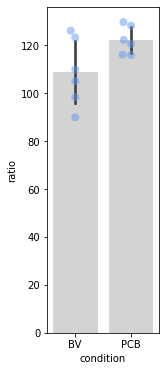

In [2]:
df = pd.read_csv("20211021-iRFP-mNG-FCS.csv")

mNG = sum(df["concentration"][df["condition"]=="mNG"])/len(df["concentration"][df["condition"]=="mNG"])
BV = df["condition"]=="BV"
PCB = df["condition"]=="PCB"

df["ratio"] = df["concentration"]/mNG * 100
t, p = st.ttest_ind(df["concentration"][df["condition"]=="BV"], df["concentration"][df["condition"]=="PCB"], equal_var=False)

plt.figure(figsize=(2,6))
plt.rcParams['pdf.fonttype'] = 42
sns.barplot(data=df[BV | PCB], x='condition', y='ratio', color ='lightgrey', ci="sd")
sns.swarmplot(x="condition", y="ratio", data=df[BV | PCB], color="cornflowerblue", size=8, alpha =0.5)
print(f'{t:.3f}')
print(f'{p:.3f}')
#plt.savefig("20211021-iRFP-mNG-FCS.pdf")